## Random forest classification and regression models

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('LassoForwardSelectionDataSetForModelling.csv')
#lassoFeatures = pd.read_csv('top10predictorsLasso_cv.csv')['0'].tolist()
forwardSelectionFeatures = pd.read_csv('ForwardSelectionVia5FoldCV.csv')["0"].tolist()

y_qualitative = df['AboveAverageLifeExpectancyByYear']
y_quantitative = df['Life expectancy at birth, total (years)']
#xLasso = df[np.intersect1d(df.columns, lassoFeatures)]
xFowardSelection = df[np.intersect1d(df.columns, forwardSelectionFeatures)]

forwardSelectionFeatures

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Arable land (% of land area)',
 'Arable land (hectares per person)',
 'CO2 emissions from solid fuel consumption (kt)',
 'GDP per capita (current US$)',
 'Merchandise exports by the reporting economy, residual (% of total merchandise exports)',
 'Merchandise trade (% of GDP)',
 'Permanent cropland (% of land area)',
 'Population density (people per sq. km of land area)',
 'Urban population (% of total)']

### Random Forest Classifier
https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f#:~:text=Random%20Forest%20Classifier%20in%20Python%201%20Data%20Preprocessing.,...%205%20Tune%20the%20hyperparameters%20with%20RandomSearchCV.%20

In [6]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xFowardSelection, y_qualitative, test_size = 0.25, random_state = 42)

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
seed =1
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')
# Train the model on training data
rf.fit(X_train.values, y_train.values);

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score


In [15]:
y_pred = rf.predict(X_test.values)
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")


The accuracy of the model is 90.5 %


In [18]:
train_probs = rf.predict_proba(X_train.values)[:,1] 
probs = rf.predict_proba(X_test.values)[:, 1]
train_predictions = rf.predict(X_train.values)

In [19]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.9774144700901714
Test ROC AUC  Score: 0.9721803150081468


Recall Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}
Precision Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}
Roc Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}


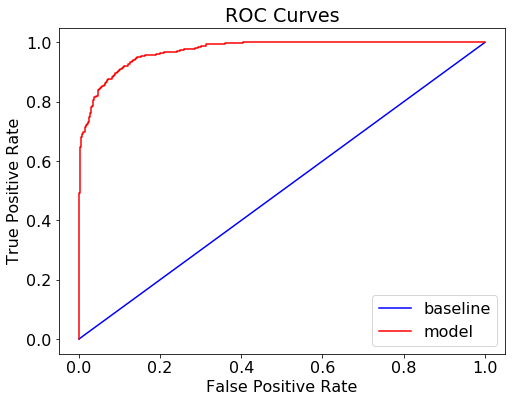

In [26]:
def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train,       train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
          print(f'{metric.capitalize()} '\
                 'Baseline: {round(baseline[metric], 2)} '\
                 'Test: {round(results[metric], 2)} '\
                 'Train: {round(train_results[metric], 2)}')
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.savefig('ROC_RandomForestClassifier.png')
    plt.show();
                
evaluate_model(y_pred,probs,train_predictions,train_probs)

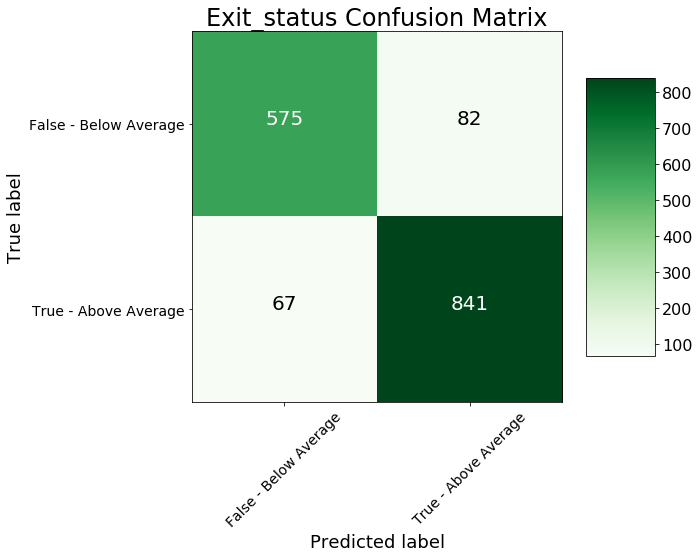

In [27]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)
    plt.savefig('ConfusionMatrixRandomForest.png')

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['False - Below Average', 'True - Above Average'],
                      title = 'Exit_status Confusion Matrix')

In [23]:
print(rf.feature_importances_)
print(f" There are {len(rf.feature_importances_)} features in total")

[0.22581201 0.02117526 0.03783052 0.04779354 0.33441586 0.01166543
 0.01133058 0.02525007 0.03002125 0.25470549]
 There are 10 features in total


In [29]:
featureImporance = pd.DataFrame({'Feature':forwardSelectionFeatures, 'Importance':rf.feature_importances_})
fi = featureImporance.sort_values(by=['Importance'], ascending=False)
fi.to_csv("RandomForestClassifierImportanceFeater.csv")
fi

,Feature,Importance
4,GDP per capita (current US$),0.334416
9,Urban population (% of total),0.254705
0,"Adolescent fertility rate (births per 1,000 wo...",0.225812
3,CO2 emissions from solid fuel consumption (kt),0.047794
2,Arable land (hectares per person),0.037831
8,Population density (people per sq. km of land ...,0.030021
7,Permanent cropland (% of land area),0.025250
1,Arable land (% of land area),0.021175
5,"Merchandise exports by the reporting economy, ...",0.011665
6,Merchandise trade (% of GDP),0.011331


### Random Forest Regressor
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [25]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(xFowardSelection, y_quantitative, test_size = 0.25, random_state = 42)


In [68]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [70]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (4694, 10)
Training Labels Shape: (4694,)
Testing Features Shape: (1565, 10)
Testing Labels Shape: (1565,)


In [71]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.86 degrees.


In [72]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.48 %.


In [76]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

regressionFeatureImporance = pd.DataFrame({'Feature':forwardSelectionFeatures, 'Importance':importances})
regressionFeatureImporance.sort_values(by=['Importance'], ascending=False)

,Feature,Importance
4,GDP per capita (current US$),0.681174
0,"Adolescent fertility rate (births per 1,000 wo...",0.159541
9,Urban population (% of total),0.049071
2,Arable land (hectares per person),0.023934
8,Population density (people per sq. km of land ...,0.021316
1,Arable land (% of land area),0.015999
7,Permanent cropland (% of land area),0.014079
6,Merchandise trade (% of GDP),0.013577
3,CO2 emissions from solid fuel consumption (kt),0.012731
5,"Merchandise exports by the reporting economy, ...",0.008577
